In [2]:
# example of extracting and resizing faces into a new dataset
from os import listdir
from numpy import asarray
from numpy import savez_compressed
from PIL import Image
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
varNames = ["image_id","5_o_Clock_Shadow","Arched_Eyebrows","Attractive","Bags_Under_Eyes","Bald","Bangs","Big_Lips",
            "Big_Nose","Black_Hair","Blond_Hair","Blurry","Brown_Hair","Bushy_Eyebrows","Chubby","Double_Chin","Eyeglasses","Goatee",
            "Gray_Hair","Heavy_Makeup","High_Cheekbones","Male","Mouth_Slightly_Open","Mustache","Narrow_Eyes","No_Beard","Oval_Face",
            "Pale_Skin","Pointy_Nose","Receding_Hairline","Rosy_Cheeks","Sideburns","Smiling","Straight_Hair","Wavy_Hair",
            "Wearing_Earrings","Wearing_Hat","Wearing_Lipstick","Wearing_Necklace","Wearing_Necktie","Young"]
data_attractive = pd.read_csv('list_attr_celeba.csv', nrows=None)['Attractive'].to_numpy()

# load an image as an rgb numpy array
def load_image(filename):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    return pixels
 
# extract the face from a loaded image and resize
def extract_face(model, pixels, required_size=(80, 80)):
    # detect face in the image
    faces = model.detect_faces(pixels)
    # skip cases where we could not detect a face
    if len(faces) == 0:
        return None
    # extract details of the face
    x1, y1, width, height = faces[0]['box']
    # force detected pixel values to be positive (bug fix)
    x1, y1 = abs(x1), abs(y1)
    # convert into coordinates
    x2, y2 = int(x1 + (width*1.2)), int(y1 + (height*1.2))
    if (x1 -width/4) < 0:
        x1 = 0
    else:
        x1 = int(x1 - width/4)
    if (y1 - height/2) < 0:
        y1 = 0
    else:
        y1 = int(y1 - height/2)
    # retrieve face pixels
    face_pixels = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face_pixels)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array
 
# load images and extract faces for all images in a directory
def load_faces(directory, n_faces):
    # prepare model
    model = MTCNN()
    faces = list()
    ids = list()
    # enumerate files
    for idx, filename in enumerate(listdir(directory)):
        # load the image
        pixels = load_image(directory + filename)
        # get face
        face = extract_face(model, pixels)
        if face is None:
            continue
        if data_attractive[idx] == -1.0:
            continue
        # store
        faces.append(face)
        ids.append(idx)
        if len(faces)%10==0:
            print(len(faces), face.shape)
            print(idx)
        # stop once we have enough
        if len(faces) >= n_faces:
            break
    return asarray(faces),asarray(ids)
 
# directory that contains all images
directory = 'C:/Users/lenovo/Desktop/Masters/Semester 2/Deep Learning/project/celebA/img_align_celeba/img_align_celeba/'
# load and extract all faces
#n_faces = 50000
n_faces = 20
all_faces, all_ids = load_faces(directory, n_faces)
print('Loaded faces: ', all_faces.shape)
print('Loaded ids: ', all_ids.shape)
qSave = True
if qSave:
    savez_compressed('img_align_celeba_attractive_full1.npz', all_faces)
    savez_compressed('ids_align_celeba_attractive_full1.npz', all_ids)


10 (80, 80, 3)
18
20 (80, 80, 3)
37
Loaded faces:  (20, 80, 80, 3)
Loaded ids:  (20,)


(20, 80, 80, 3)
20


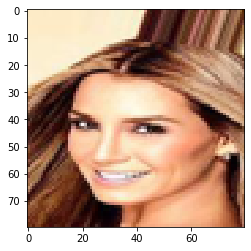

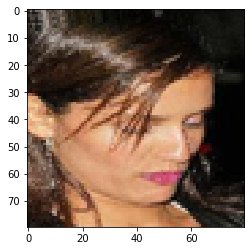

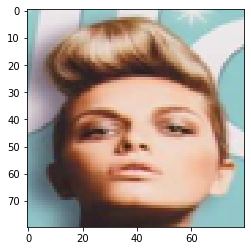

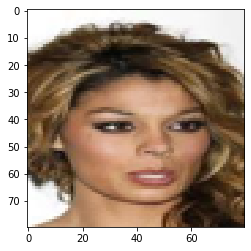

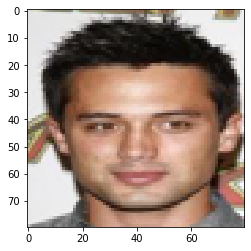

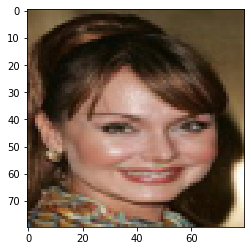

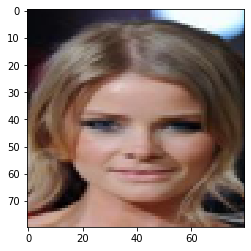

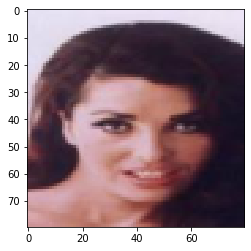

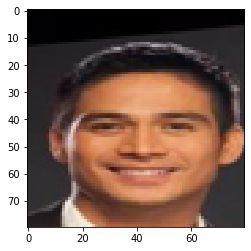

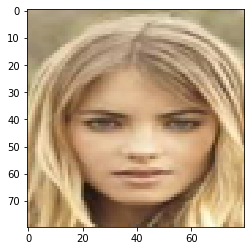

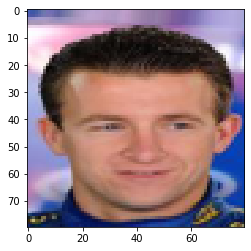

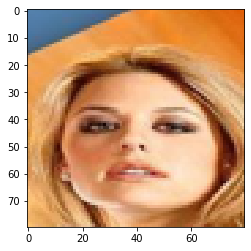

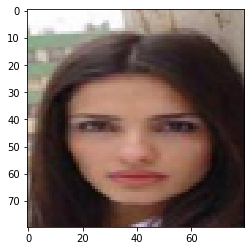

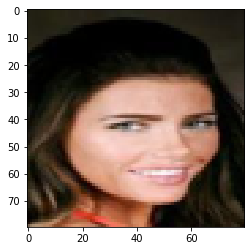

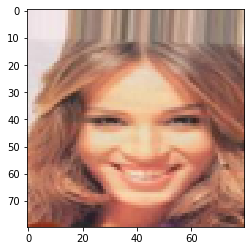

In [4]:
#For visualizing the created file
import numpy as np
import matplotlib.pyplot as plt
dfile = "img_align_celeba_attractive_full1.npz"
images = np.load(dfile)["arr_0"]
print(images.shape)
lst = len(images)
print(lst)
for item in range(0,15):
    plt.ion()
    plt.figure()
    plt.imshow(images[item])

In [5]:
dfile = "ids_align_celeba_attractive_full1.npz"
ids = np.load(dfile)["arr_0"]
print(ids.shape)
print(ids)

(20,)
[ 0  3  4  5  6  8  9 10 11 18 22 23 25 26 27 28 32 33 34 37]


(50000, 80, 80, 3)
50000


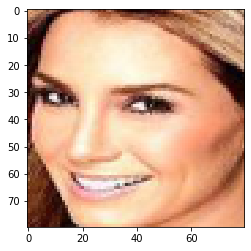

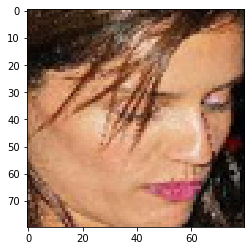

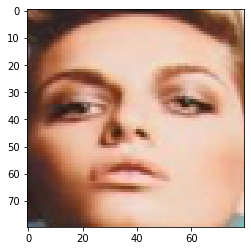

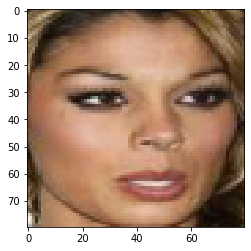

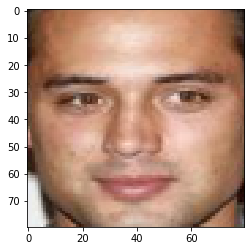

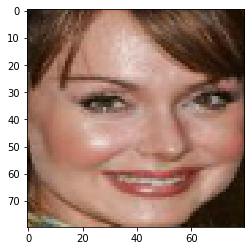

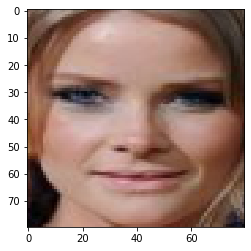

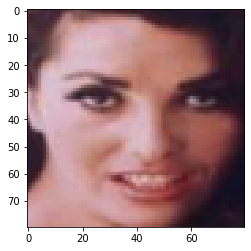

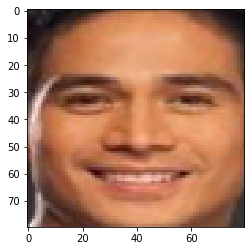

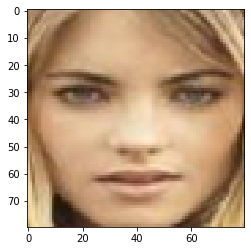

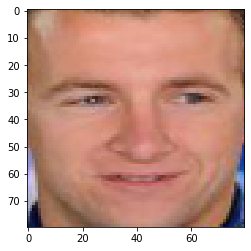

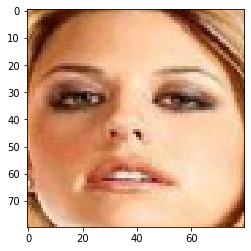

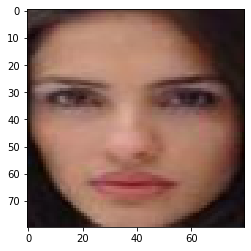

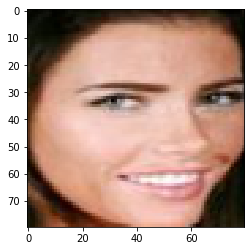

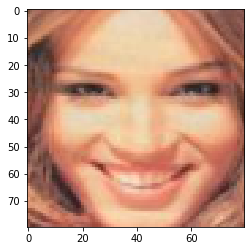

In [1]:
#For visualizing the created file
import numpy as np
import matplotlib.pyplot as plt
dfile = "img_align_celeba_attractive_face.npz"
images = np.load(dfile)["arr_0"]
print(images.shape)
lst = len(images)
print(lst)
for item in range(0,15):
    plt.ion()
    plt.figure()
    plt.imshow(images[item])